In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Rainfall.csv')
df.head(15)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
5,6,1018.8,24.3,20.9,19.2,18.0,84,51,yes,7.7,20.0,14.5
6,7,1021.8,21.4,18.8,17.0,15.0,79,56,no,3.4,30.0,21.5
7,8,1020.8,21.0,18.4,16.5,14.4,78,28,no,7.7,60.0,14.3
8,9,1020.6,18.9,18.1,17.1,14.3,78,79,no,3.3,70.0,39.3
9,10,1017.5,18.5,18.0,17.2,15.5,85,91,yes,0.0,70.0,37.7


In [ ]:
df.shape

(366, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


In [ ]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
df.rename(str.strip,
          axis='columns',
          inplace=True)

df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [ ]:
df['winddirection'].fillna(df['winddirection'].mean(), inplace=True)

df['windspeed'].fillna(df['windspeed'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


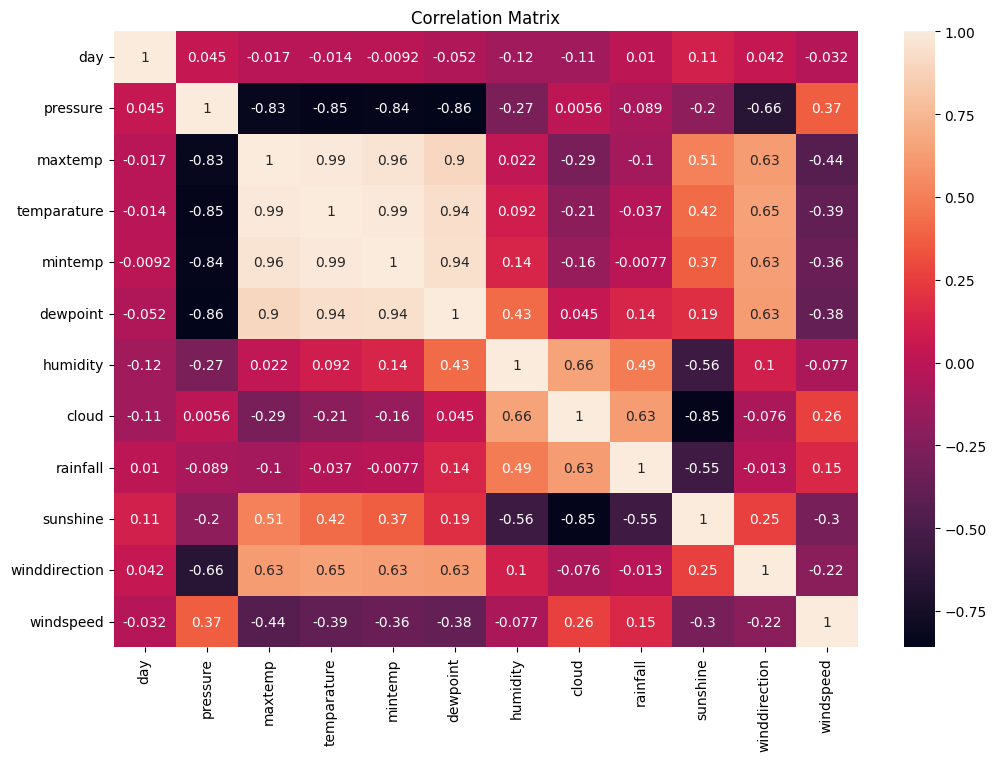

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df['rainfall'] = df['rainfall'].map({'yes': 1, 'no': 0})

In [ ]:
df['rainfall'].value_counts()

,count
rainfall,
1,249
0,117


In [ ]:
df_majority = df[df['rainfall'] == 1]
df_minority = df[df['rainfall'] == 0]

In [ ]:
df_minority_upsampled = resample(df_minority,
                                replace = True,
                                n_samples = 249,
                                random_state = 123)

In [ ]:
df_final = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
df_final['rainfall'].value_counts()

,count
rainfall,
1,249
0,249


In [ ]:
X = df_final.drop('rainfall', axis=1)
y = df_final['rainfall']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgboost = XGBClassifier()
xgb_model = xgboost.fit(X_train, y_train)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('Classification Report\n:', classification_report(y_test, y_pred_xgb))

Accuracy: 0.87
Classification Report
:               precision    recall  f1-score   support

           0       0.85      0.90      0.87        49
           1       0.90      0.84      0.87        51

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



In [ ]:
logreg = LogisticRegression()
logreg_model = logreg.fit(X_train, y_train)

In [ ]:
y_pred_logreg = logreg_model.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred_logreg))
print('Classification Report\n:', classification_report(y_test, y_pred_logreg))

Accuracy: 0.84
Classification Report
:               precision    recall  f1-score   support

           0       0.87      0.80      0.83        49
           1       0.82      0.88      0.85        51

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100

